# **Hotel Booking Final Project**

**Created by:** M Hassya S

### **Dataset Overview:**
The dataset hotel_bookings.csv contains comprehensive information about hotel booking records, showcasing various aspects of customer bookings for hotels. It encompasses data points such as booking status, customer details, stay duration, and financial aspects.

### **Problem Statement:**

### **Data Analytics:**
* Stakeholder: OTA (Online Travel Agency)
* Problem: How can OTA aid in increasing revenue for its lodging partner?
* Reasoning: To enchance partnership with lodging partners, improve revenue stream and modify average daily rate strategically
* Goal: Increase revenue through improved strategic average daily rate modification
* Benefit of analysis: OTA and its lodging partners can more effectively strategize pricing for their accomodations and potential marketing promotions

  * Macro Analysis: What are the impacts of the various hotel booking attributes with regards to average daily rate?
    * Micro Analysis:
      * What is the impact of amount of people staying with regards to average daily rate?
      * What is the impact of available facility (room type, meal order, special request) with regards to average daily rate?
      * What is the impact of month selection/season with regards to average daily rate?
      * When is a good time to give promotions?
  * Expected outcome:
       * Identify impact of the various attributes and identify what strategies can potentially be implemented to improve average daily rate

### **Machine Learning:**
* Stakeholder: OTA (Online Travel Agency)
* Problem: How can OTA aid in identifying which bookings have a high probability of being cancelled?
* Reasoning: High cancellation rates lead to reduced potential profits for lodging partners
* Goal: To identify which bookings have a high probability of cancellation, so that lodging partners can open a double booking an accomodation to avoid loss
* Benefit of analysis: OTA and its lodging partners can more effectively strategize pricing for their accomodations which could lead to more budget friendly average daily rates and less cancellation
* Expected outcome:
  * Classify and predict which bookings have a chance of high or low cancellation rate to allow for possible double bookings
   
  * Classification:
    * Above 70% = HIGH cancellation rate => allow opportunity for double booking
    * Below 70% = LOW cancellation rate => disallow opportunity for double booking

In [1]:
# Import Module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np

## **Load Dataset**

In [2]:
# Load the dataset
data = pd.read_csv('hotel_bookings.csv')

## **Data Understanding**

| Attribute                       | Data Type | Length | Description |
|---------------------------------|-----------|--------|-------------|
| hotel                           | object    | --     | Type of hotel (Resort Hotel or City Hotel). |
| is_canceled                     | int64     | --     | Indicates if the booking was canceled (1) or not (0). |
| lead_time                       | int64     | --     | Number of days between booking and arrival. |
| arrival_date_year               | int64     | --     | Year of arrival date. |
| arrival_date_month              | object    | --     | Month of arrival date. |
| arrival_date_week_number        | int64     | --     | Week number of the arrival date. |
| arrival_date_day_of_month       | int64     | --     | Day of the month of the arrival date. |
| stays_in_weekend_nights         | int64     | --     | Number of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel. |
| stays_in_week_nights            | int64     | --     | Number of week nights (Mon-Fri) the guest stayed or booked to stay at the hotel. |
| adults                          | int64     | --     | Number of adults. |
| children                        | float64   | --     | Number of children. |
| babies                          | int64     | --     | Number of babies. |
| meal                            | object    | --     | Type of meal booked. |
| country                         | object    | --     | Country of origin of the customer. |
| market_segment                  | object    | --     | Market segment designation. |
| distribution_channel            | object    | --     | Booking distribution channel. |
| is_repeated_guest               | int64     | --     | Indicates if the guest is a repeat (1) or not (0). |
| previous_cancellations          | int64     | --     | Number of previous bookings that were canceled by the customer. |
| previous_bookings_not_canceled  | int64     | --     | Number of previous bookings not canceled by the customer. |
| reserved_room_type              | object    | --     | Code of room type reserved. |
| assigned_room_type              | object    | --     | Code for type of room assigned to the booking. |
| booking_changes                 | int64     | --     | Number of changes/amendments made to the booking. |
| deposit_type                    | object    | --     | Type of deposit made. |
| agent                           | float64   | --     | ID of the travel agency that made the booking. |
| company                         | float64   | --     | ID of the company that made the booking or responsible for paying the booking. |
| days_in_waiting_list            | int64     | --     | Number of days the booking was on the waiting list before it was confirmed. |
| customer_type                   | object    | --     | Type of booking, assuming one of several categories. |
| adr                             | float64   | --     | Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights. |
| required_car_parking_spaces     | int64     | --     | Number of car parking spaces required by the customer. |
| total_of_special_requests       | int64     | --     | Number of special requests made by the customer. |
| reservation_status              | object    | --     | Latest status of the reservation. |
| reservation_status_date         | object    | --     | Date at which the last status was set. |


## **Exploratory Data Analysis**


In [3]:
# Display the first few rows of the dataset
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Key Findings
- There is a column named "is_canceled" indicating whether a reservation was canceled (0 for not canceled, 1 for canceled).
- The dataset includes information about the lead time, arrival date, duration of stays, number of adults, and more.
- The "arrival_date_month" column represents the month of arrival in a textual format.
- There are columns like "required_car_parking_spaces" and "total_of_special_requests" that might be useful for analyzing guest preferences and needs.
- Some columns, such as "agent" and "company," contain missing values (NaN).
- The "deposit_type" column suggests that most reservations were made without a deposit.
- The "customer_type" column provides information about the type of customers (e.g., Transient).
- The "reservation_status" and "reservation_status_date" columns provide details about the status of reservations.


In [4]:
# Basic statistics of the dataset
basic_stats = data.describe(include='all')
basic_stats


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Key Findings:

- **General Information:**
  - Total records: 119,390
  - Types of hotels: "City Hotel" and "Resort Hotel"
  - Years covered: 2015 to 2017

- **hotel:**
  - Most frequent: "City Hotel" (79,330 occurrences)

- **is_canceled:**
  - Average cancellation rate: 37.04%

- **lead_time:**
  - Average lead time: 104 days

- **arrival_date_year:**
  - Most common year: 2016

- **arrival_date_month:**
  - Most common month: August

- **arrival_date_week_number:**
  - Average week number: 27

- **arrival_date_day_of_month:**
  - Average day of the month: 15

- **stays_in_weekend_nights:**
  - Average weekend nights: 0.93

- **stays_in_week_nights:**
  - Average weeknights: 2.5

- **adults:**
  - Average number of adults: 1.86

- **...** (Similar statistics can be provided for other columns in the dataset.)

- **deposit_type:**
  - Most common deposit type: "No Deposit"

- **agent:**
  - Average agent value: 86.69 (with some missing values)

- **company:**
  - Average company value: 189.27 (with many missing values)

- **days_in_waiting_list:**
  - Average waiting time: 2.32 days

- **customer_type:**
  - Most common customer type: "Transient"

- **adr:**
  - Average daily rate (ADR): 101.83

- **required_car_parking_spaces:**
  - Average parking spaces: 0.06

- **total_of_special_requests:**
  - Average special requests: 0.57

- **reservation_status:**
  - Most common reservation status: "Check-Out"

- **reservation_status_date:**
  - Most common status date: "2015-10-21"

- **Data Range:**
  - "lead_time" ranges from 0 to 737 days.
  - "stays_in_weekend_nights" ranges from 0 to 19 nights.
  - "stays_in_week_nights" ranges from 0 to 50 nights.
  - ... (Similar ranges for other columns.)

In [5]:
# Create a DataFrame with missing values count for each column
missing_values_df = data.isnull().sum().reset_index()
missing_values_df.columns = ['Attribute', 'Missing Values']

# Display the DataFrame
missing_values_df

,Attribute,Missing Values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


### Missing value findings:
* children = 4 missing values
* country = 488 missing values
* agent = 16,340 missing values
* company = 112,593 missing values

### Missing value identification: 
* There are 4 booking orders without a children => Fill with average value maintain data integrity
* There are 488 booking orders without a country => Fill missing value with "Unknown" to maintain data integrity
* There are 16,340 booking orders without an agent ID => Fill missing value with "Unknown" maintain data integrity
* There are 112,593 booking orders without company ID => Fill missing value with "Unknown" maintain data integrity

In [6]:
#Identify categorical columns in the DataFrame
categorical_cols = data.select_dtypes(include=['object']).columns

# Calculate cardinality for each categorical feature and collect the unique values as a string
cardinality_summary = pd.DataFrame({
    'Feature': categorical_cols,
    'Cardinality': [data[col].nunique() for col in categorical_cols],
    'Values': [str(data[col].unique()) for col in categorical_cols]
})

# Display the cardinality summary table
cardinality_summary


,Feature,Cardinality,Values
0,hotel,2,['Resort Hotel' 'City Hotel']
1,arrival_date_month,12,['July' 'August' 'September' 'October' 'Novemb...
2,meal,5,['BB' 'FB' 'HB' 'SC' 'Undefined']
3,country,177,['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU'...
4,market_segment,8,['Direct' 'Corporate' 'Online TA' 'Offline TA/...
5,distribution_channel,5,['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
6,reserved_room_type,10,['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
7,assigned_room_type,12,['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
8,deposit_type,3,['No Deposit' 'Refundable' 'Non Refund']
9,customer_type,4,['Transient' 'Contract' 'Transient-Party' 'Gro...


### Key Findings:

- **hotel:** 2 unique values
- **arrival_date_month:** 12 unique values
- **meal:** 5 unique values
- **country:** 177 unique values
- **market_segment:** 8 unique values
- **distribution_channel:** 5 unique values
- **reserved_room_type:** 10 unique values
- **assigned_room_type:** 12 unique values
- **deposit_type:** 3 unique values
- **customer_type:** 4 unique values
- **reservation_status:** 3 unique values
- **reservation_status_date:** 926 unique values



In [7]:
# Code to calculate the number of duplicate rows for each attribute in the dataset
attributes = data.columns
duplicates = [data[col].duplicated().sum() for col in attributes]
formats = [data[col].dtype for col in attributes]

# Create a DataFrame with the results
duplicates_format_df = pd.DataFrame({
    'Attribute': attributes,
    'Duplicates': duplicates,
    'Format': formats
})

# Display the DataFrame
duplicates_format_df


,Attribute,Duplicates,Format
0,hotel,119388,object
1,is_canceled,119388,int64
2,lead_time,118911,int64
3,arrival_date_year,119387,int64
4,arrival_date_month,119378,object
5,arrival_date_week_number,119337,int64
6,arrival_date_day_of_month,119359,int64
7,stays_in_weekend_nights,119373,int64
8,stays_in_week_nights,119355,int64
9,adults,119376,int64


### Key Findings:

- **hotel:** Object format
- **is_canceled:** Integer format (int64), no duplicates
- **lead_time:** Integer format (int64), some duplicates
- **arrival_date_year:** Integer format (int64), some duplicates
- **arrival_date_month:** Object format, some duplicates
- **...** (Similar information for other attributes.)
- **agent:** Float format (float64), some duplicates
- **company:** Float format (float64), some duplicates
- **days_in_waiting_list:** Integer format (int64), some duplicates
- **customer_type:** Object format, some duplicates
- **adr:** Float format (float64), some duplicates
- **required_car_parking_spaces:** Integer format (int64), some duplicates
- **total_of_special_requests:** Integer format (int64), some duplicates
- **reservation_status:** Object format, some duplicates
- **reservation_status_date:** Object format, some duplicates


In [8]:
data[data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


### Data Duplicate Head
Display of columns and rows with duplicated data present

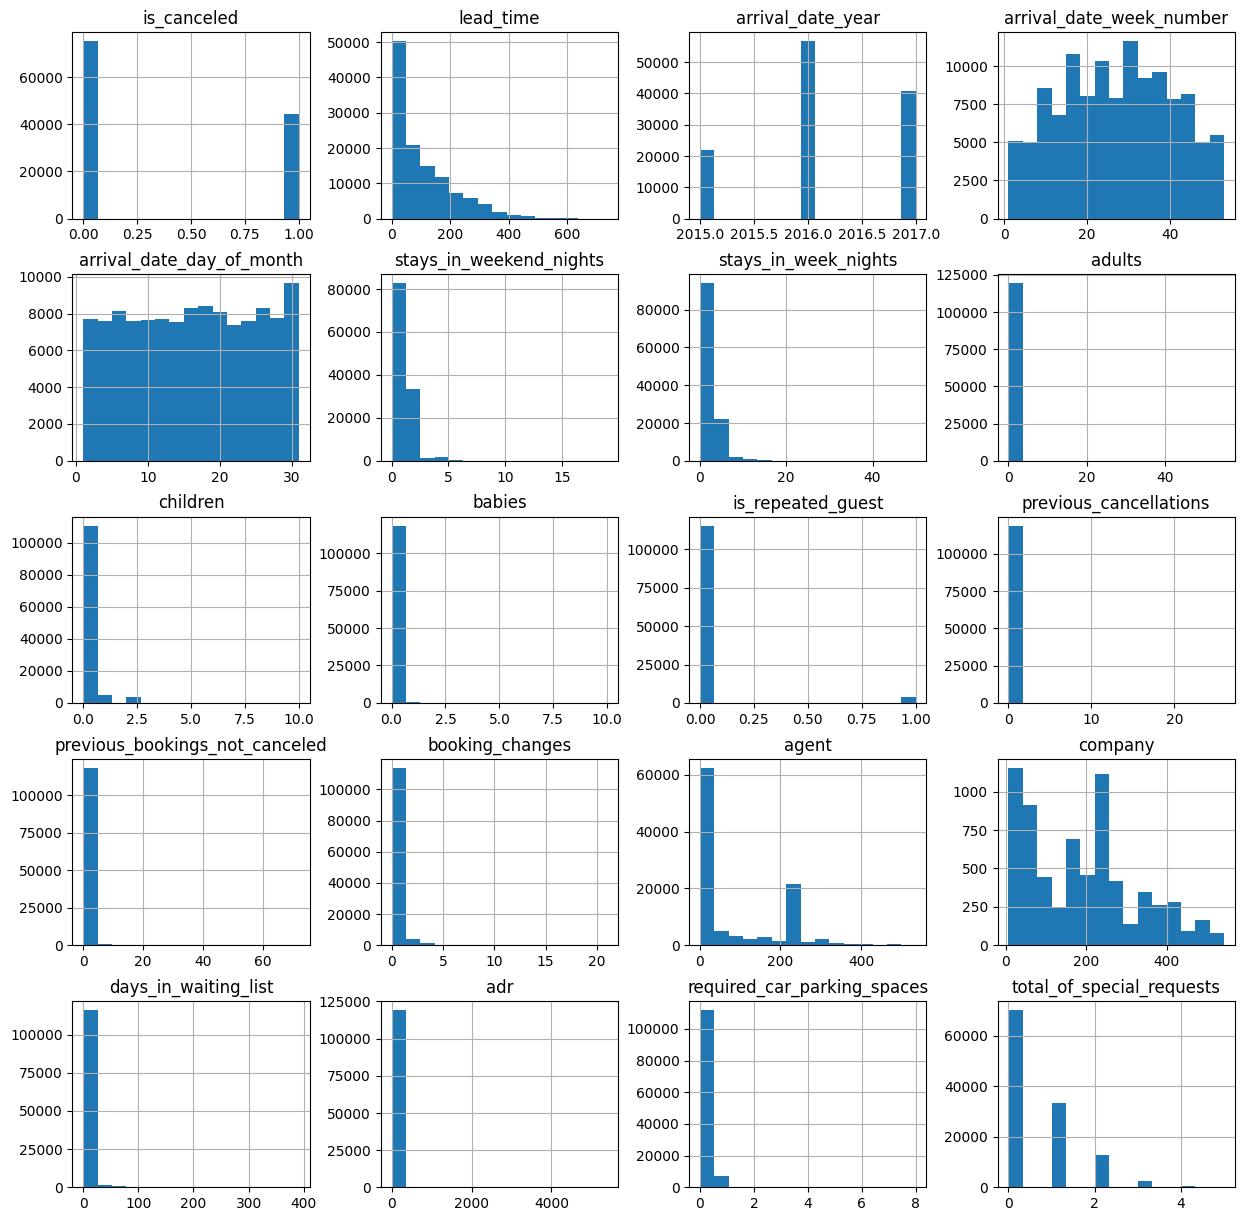

In [9]:
# Histograms for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].hist(bins=15, figsize=(15, 15))
plt.show()


### Key Findings:

1. **is_canceled**: Binary distribution showing most bookings are not canceled.
2. **lead_time**: Right-skewed distribution; most bookings are made a short time in advance.
3. **arrival_date_year**: Bookings are spread over 2015 to 2017, with an increase each year.
4. **arrival_date_week_number**: Bookings peak around mid-year, indicating seasonality.
5. **arrival_date_day_of_month**: Fairly uniform distribution across the month.
6. **stays_in_weekend_nights**: Most stays don't include many weekend nights.
7. **stays_in_week_nights**: Most stays are short, with few weeknights.
8. **adults**: Most bookings are for two adults.
9. **children**: Most bookings include no children.
10. **babies**: Babies are rare in bookings.
11. **is_repeated_guest**: Few repeated guests.
12. **previous_cancellations**: Most bookings have no previous cancellations.
13. **previous_bookings_not_canceled**: Most guests do not have a history of previous bookings.
14. **booking_changes**: Most bookings have no changes.
15. **agent**: A wide distribution with some agents making more bookings than others.
16. **company**: Very few bookings are associated with companies.
17. **days_in_waiting_list**: Most bookings have no waiting period.
18. **adr (Average Daily Rate)**: Right-skewed distribution; most rates are on the lower end.
19. **required_car_parking_spaces**: Most bookings require no parking spaces.
20. **total_of_special_requests**: Most bookings have few or no special requests.

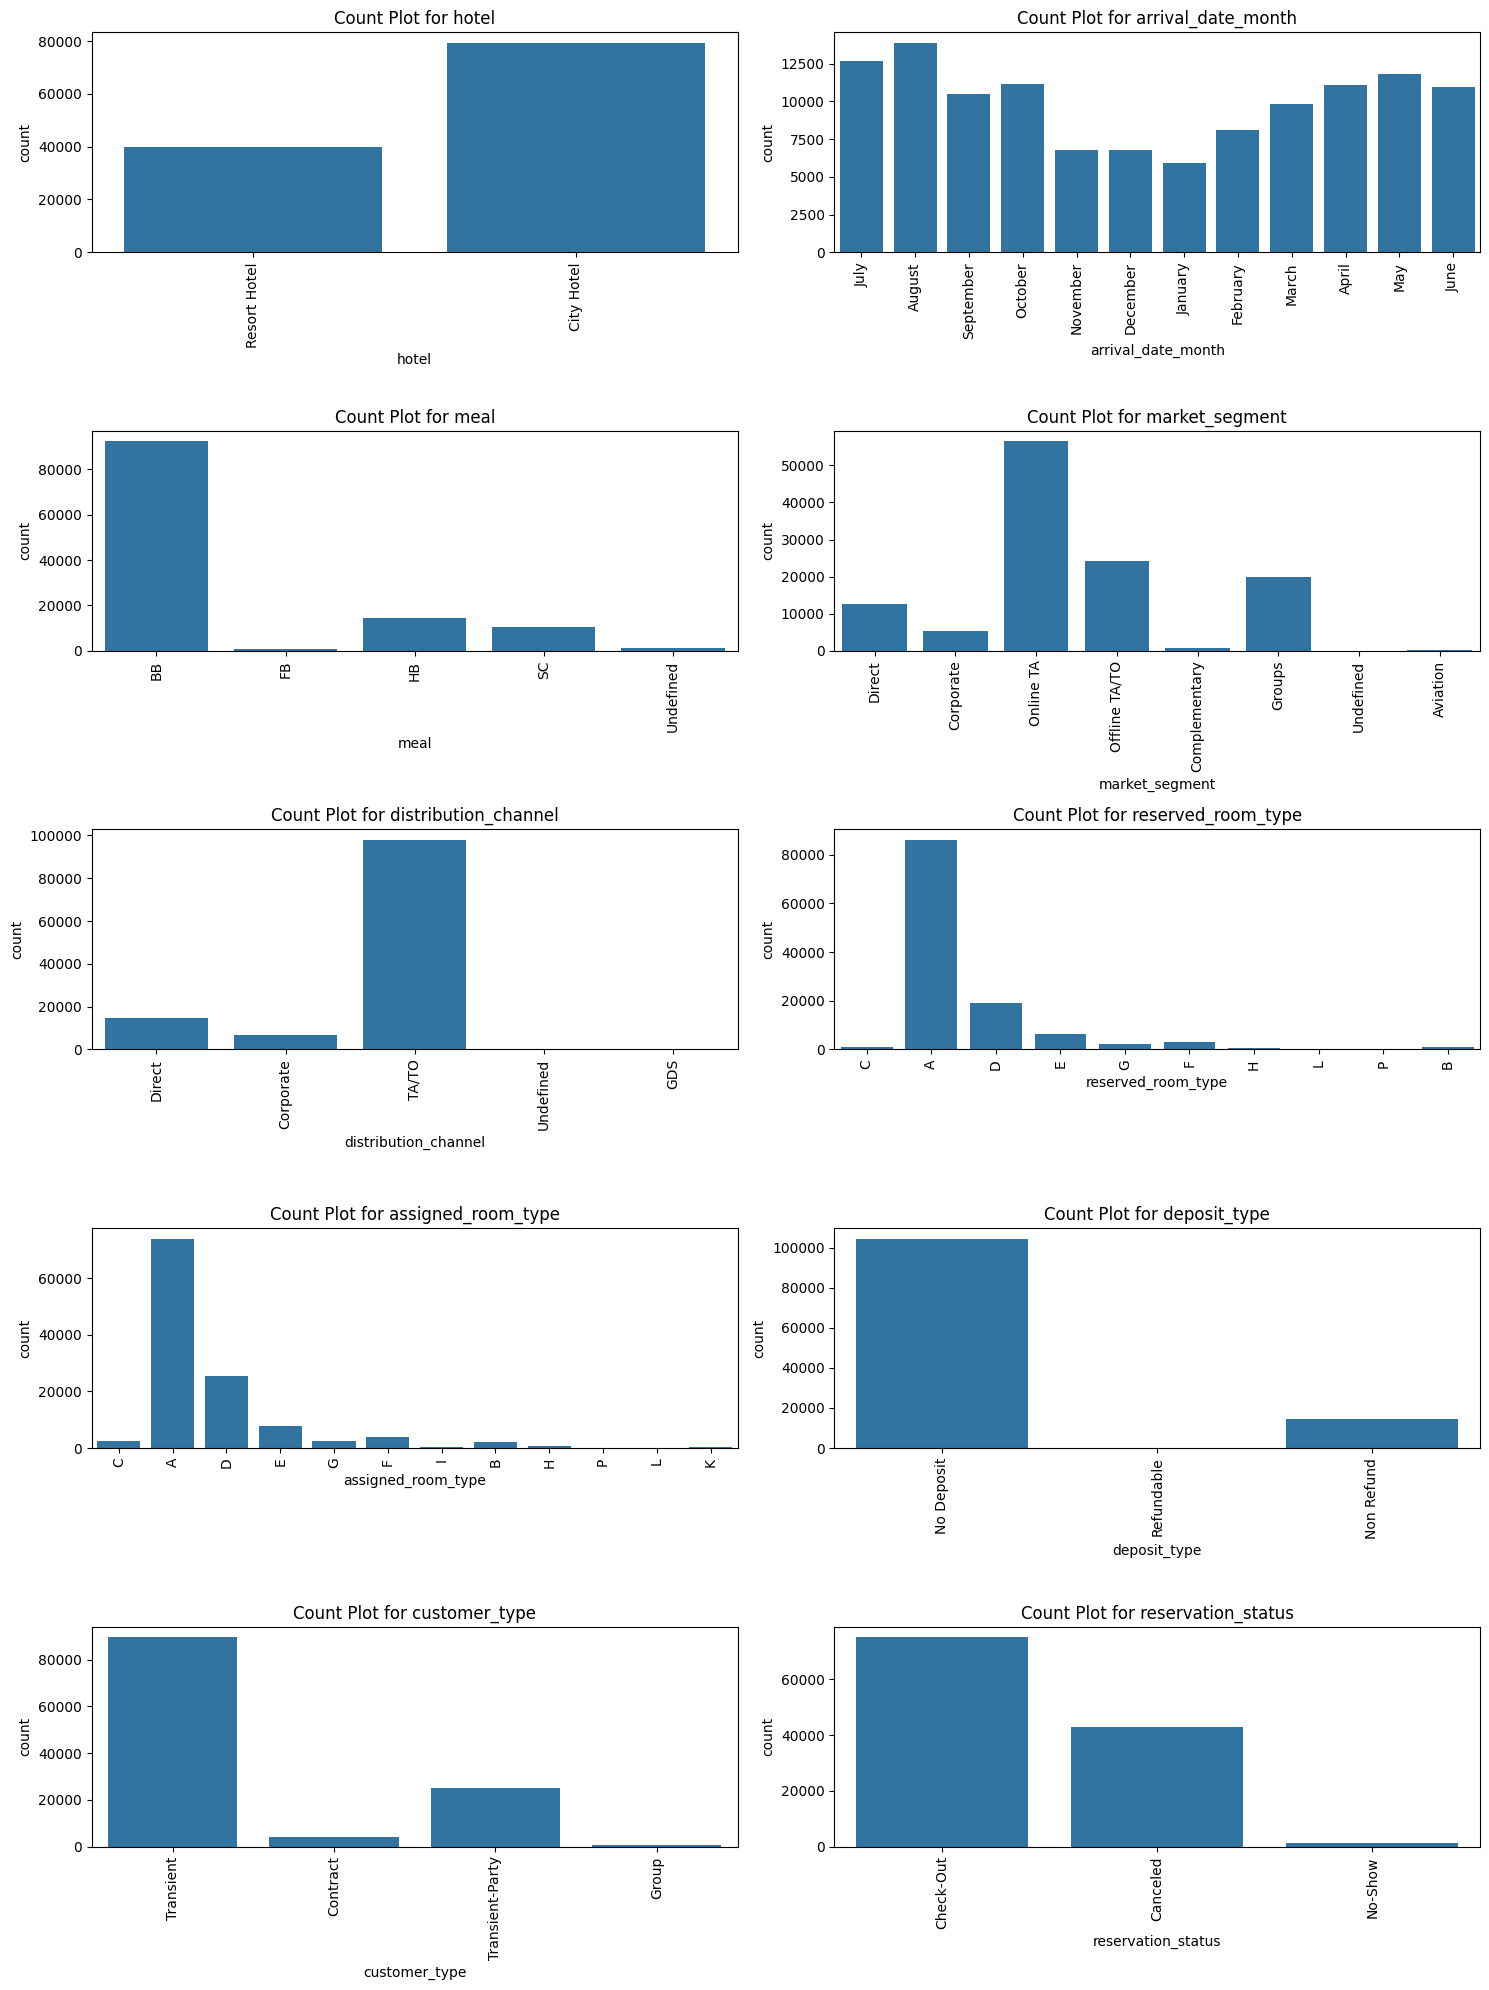

In [10]:
#'data' is the DataFrame loaded with hotel bookings data
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['country', 'reservation_status_date'])  # Exclude 'country' and 'reservation_status_date'

# Number of rows and columns for the subplot
n_rows = len(categorical_cols) // 2 + len(categorical_cols) % 2
n_cols = 2

# Create a large figure to hold all the subplots
plt.figure(figsize=(15, n_rows * 4))

# Loop through the categorical columns and create a count plot for each
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=90)
    plt.title(f'Count Plot for {col}')

# Adjust the layout
plt.tight_layout()
plt.show()


### Key Findings:

1. **hotel**: More bookings for City Hotel than Resort Hotel.
2. **arrival_date_month**: August has the highest, while January has the fewest bookings.
3. **meal**: The 'BB' meal type is the most common.
4. **market_segment**: 'Online TA' dominates the market segment.
5. **distribution_channel**: Most bookings come through 'TA/TO'.
6. **reserved_room_type**: One room type is far more common than others.
7. **assigned_room_type**: Similar to reserved_room_type, indicating most get the room they booked.
8. **customer_type**: 'Transient' is the most common customer type.
9. **deposit_type**: 'No Deposit' is overwhelmingly more common.
10. **reservation_status**: 'Check-Out' is most common, indicating completed stays.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18044\936992776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


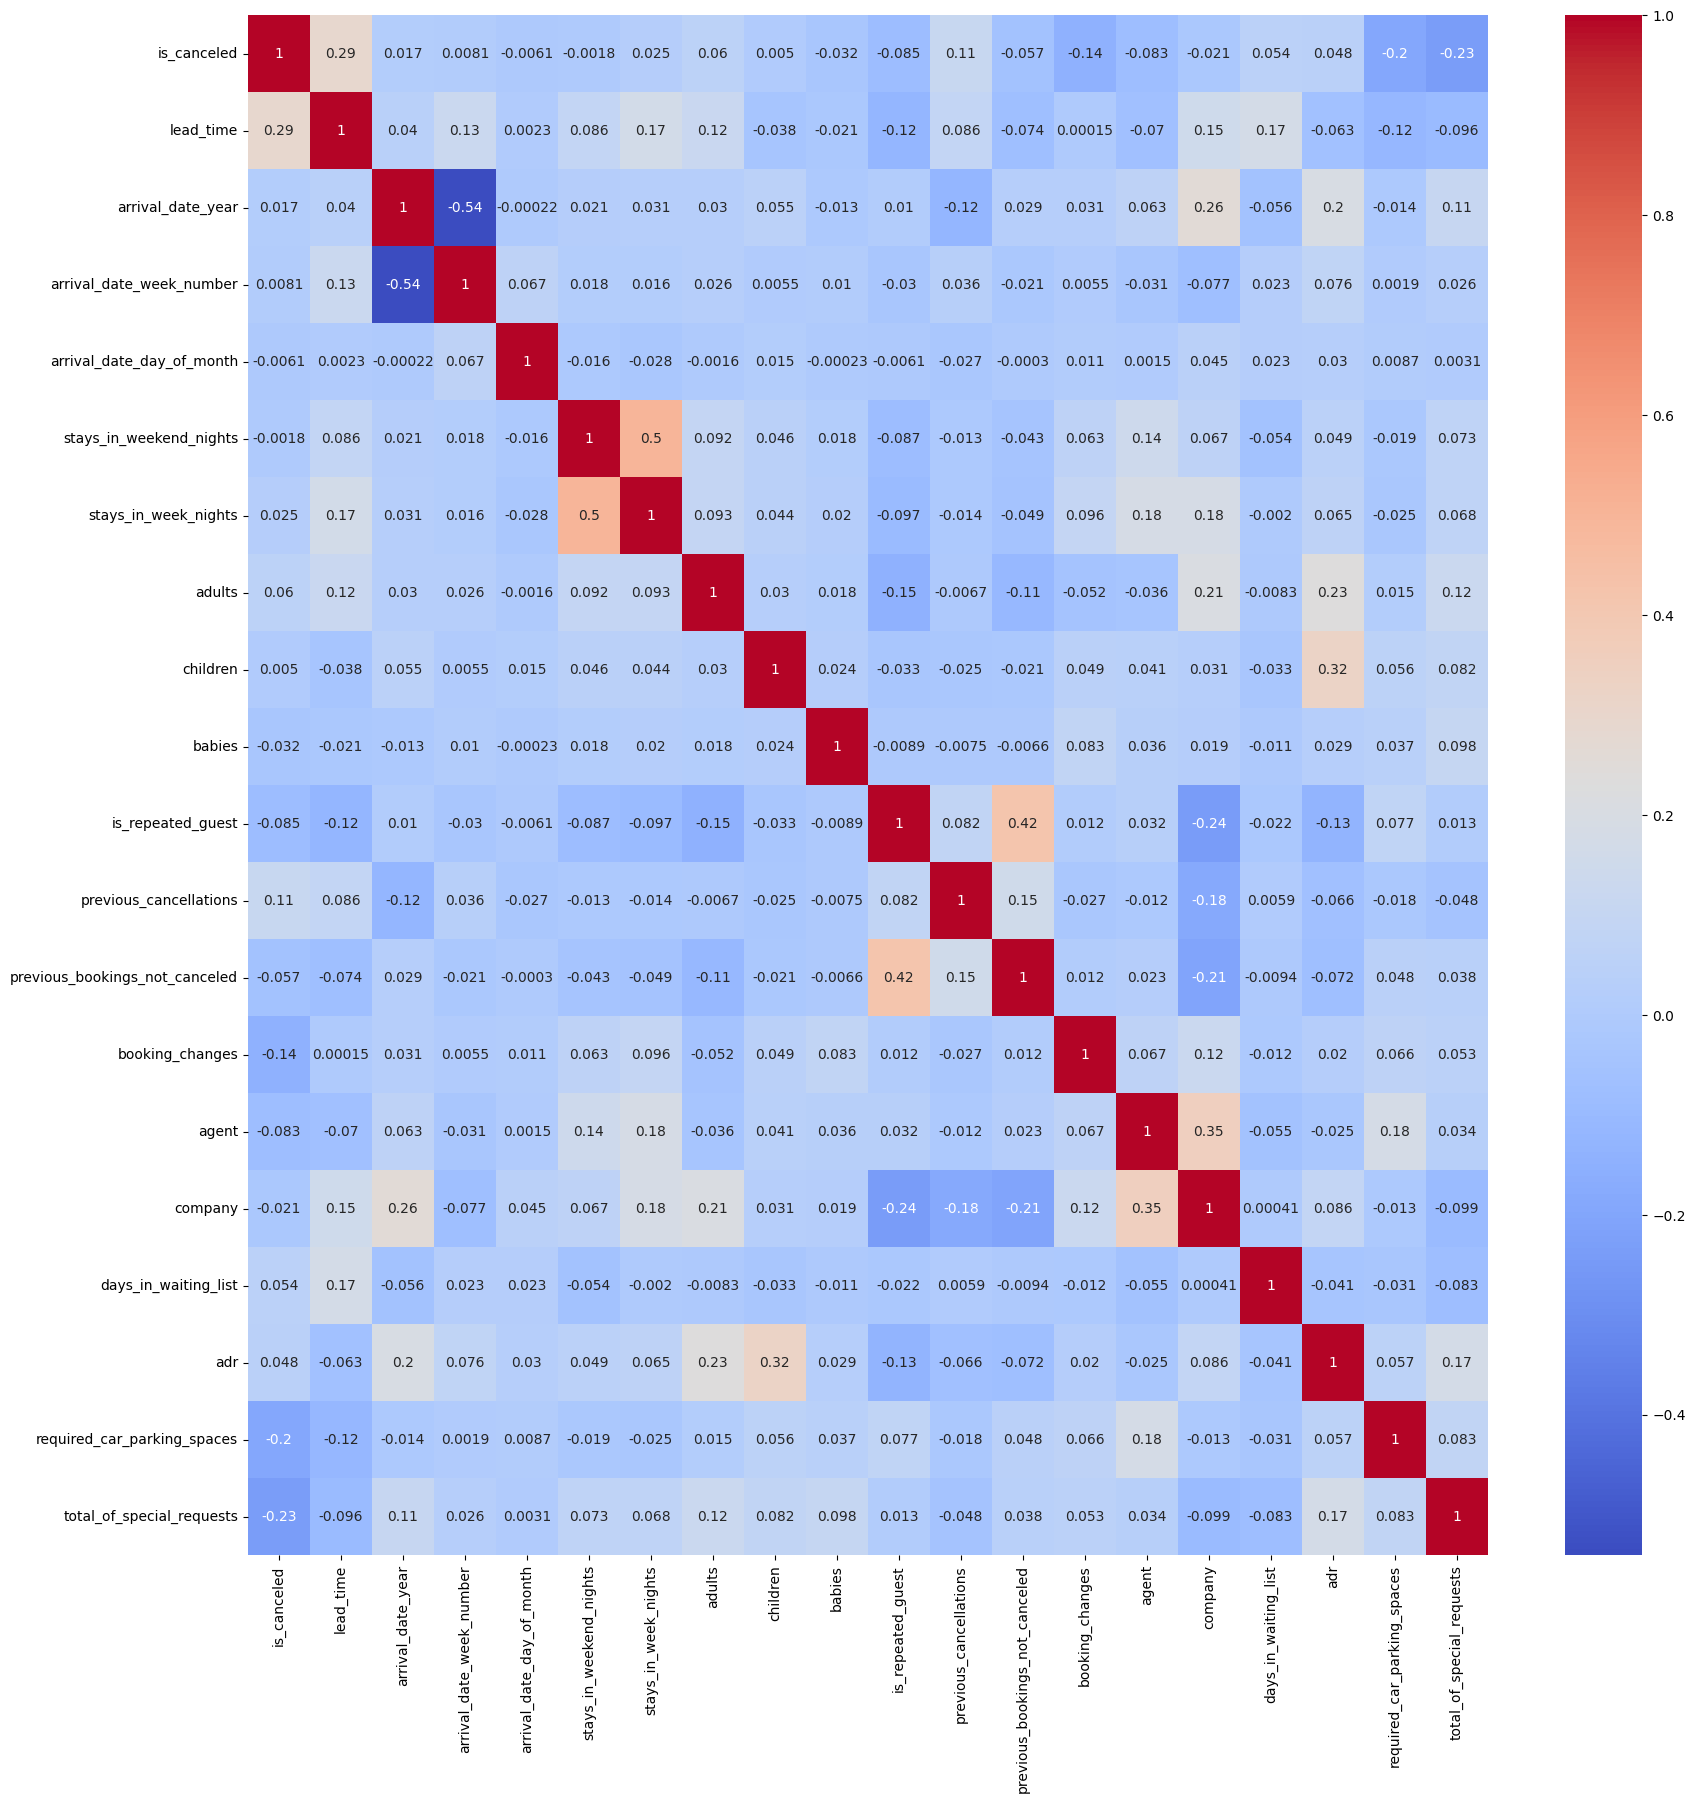

In [11]:
# Correlation matrix
corr_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Correlation Findings
- Positive correlations of note:
  - `total_of_special_requests` has a mild positive correlation with `adr` suggesting that more expensive bookings might have more special requests.
  - `previous_bookings_not_canceled` and `is_repeated_guest` are somewhat positively correlated, which is expected.
- Negative correlations of note:
  - `lead_time` has a negative correlation with `adr`, possibly indicating last-minute bookings might be cheaper.
  - `total_of_special_requests` is negatively correlated with `is_canceled`, suggesting that bookings with more special requests are less likely to be canceled.

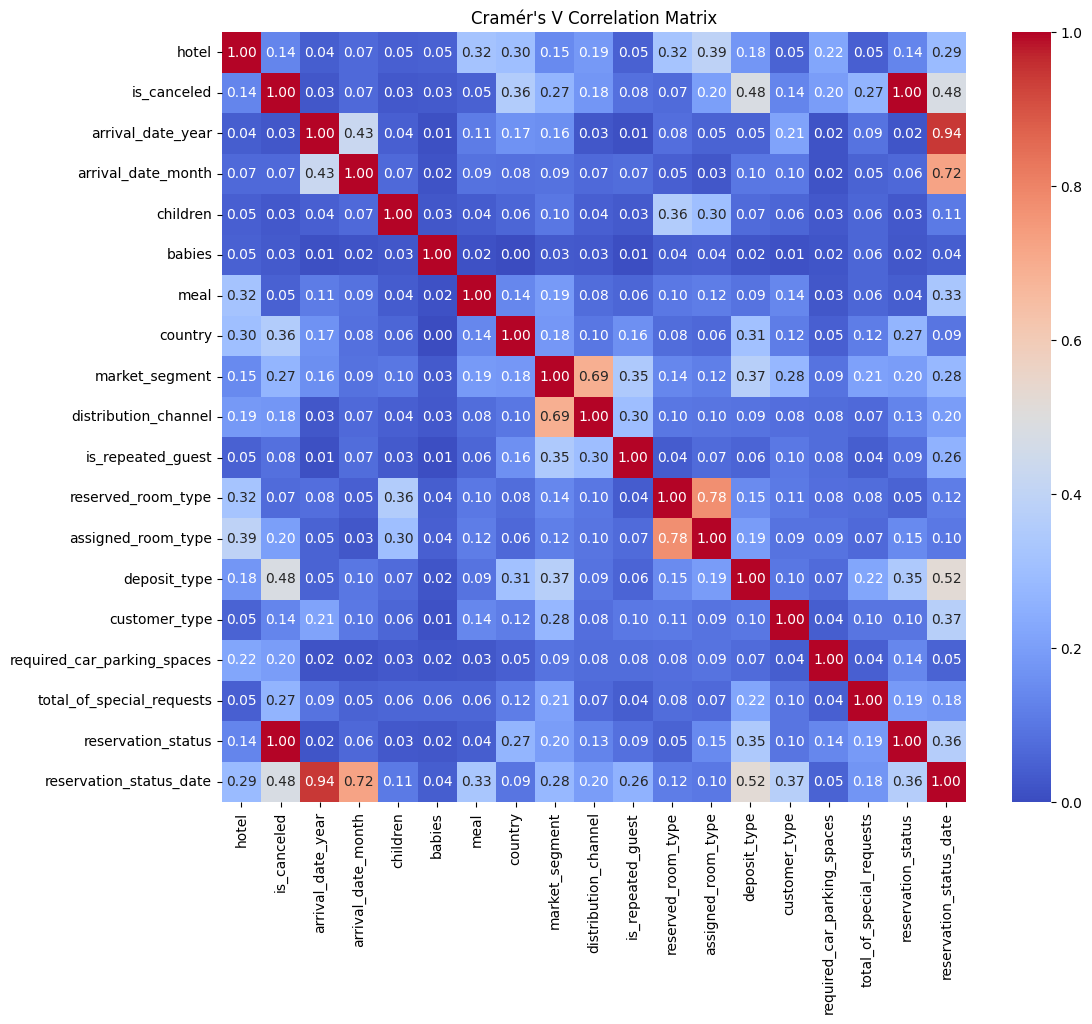

In [12]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for a given chi-squared statistic."""
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Assuming 'data' is your loaded DataFrame
# data = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your dataset file path if needed

# Identify categorical columns
categorical_columns = [col for col in data.columns 
                       if data[col].dtype == 'object' or len(data[col].unique()) < 10]

# Initialize an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the matrix to float type for plotting
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Cramér's V Correlation Matrix")
plt.show()

1. **Strong Correlations**: There are several pairs of variables with strong correlations (values close to 1 or -1):
   - `arrival_date_year` and `arrival_date_month` have a high positive correlation (0.43), suggesting that there might be a trend or seasonality effect across months and years in the data.
   - `market_segment` and `distribution_channel` also show a strong positive correlation (0.69), indicating that certain market segments may predominantly use specific distribution channels.
   - `reserved_room_type` and `assigned_room_type` have a high correlation (0.78), which could mean that guests typically get the room type they reserve.

2. **Moderate Correlations**:
   - `is_canceled` shows moderate positive correlations with `deposit_type` (0.48) and `reservation_status` (1.00). This could imply that the type of deposit and the reservation status are good indicators of whether a booking will be canceled.
   - `reservation_status` also correlates strongly with `reservation_status_date` (0.94), suggesting that the date when the status is recorded is predictive of the status itself.

3. **Weak or No Correlation**: Many variables have low correlations (close to 0) with each other. For instance, variables like `meal`, `country`, and `babies` have low correlation values with most other variables, implying that there is no strong relationship between these and other factors in the context of the hotel booking data.

4. **Color Gradient**: The color gradient from red to blue represents the strength of the correlation, with red being a stronger positive association and blue representing a weaker association.

In summary, the matrix suggests that while some aspects of hotel booking data are strongly related, such as room types and reservation details, other factors like meals and country of origin do not show strong associations with the rest of the variables. This can help in predictive modeling by focusing on variables with stronger relationships for more accurate predictions.

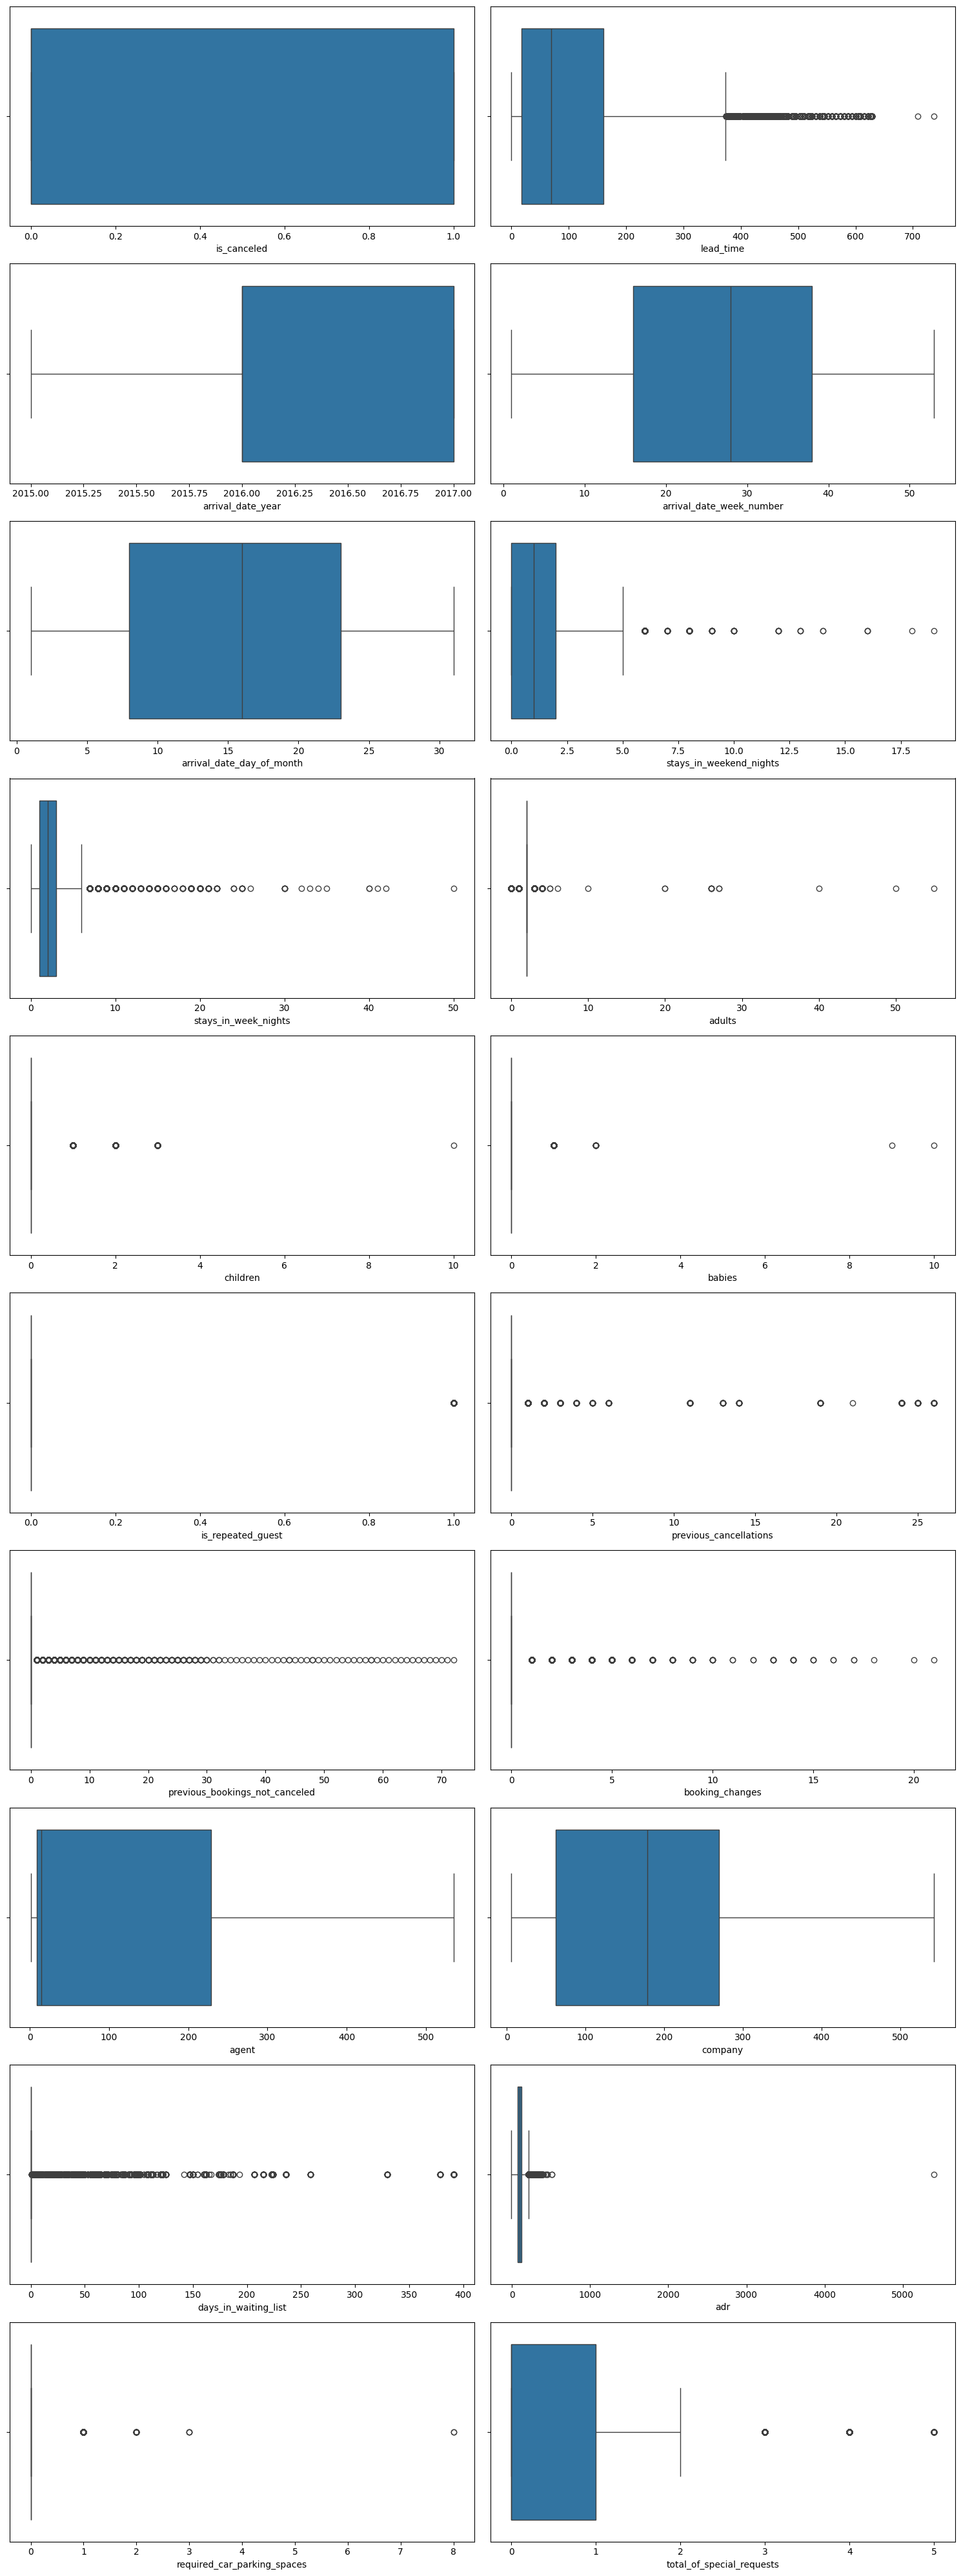

In [13]:
# Select only non-categorical (numerical) columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Number of rows and columns for the subplot
n_rows = len(numerical_cols) // 2 + len(numerical_cols) % 2
n_cols = 2

# Create a large figure to hold all the subplots
plt.figure(figsize=(15, n_rows * 4))

# Loop through the numerical columns and create a boxplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=data[col])

# Adjust the layout
plt.tight_layout()
plt.show()


### Boxplot Findings:

- The boxplots show the distribution of numeric features with potential outliers.
- For most features, the data is concentrated near the lower end of the scale, with outliers stretching towards higher values.
- This indicates a wide range of values but with most data points clustered around lower values.


## **Data Preprocessing**

### Handling Missing Values
1. Drop columns country, company and agent
2. Fill NaN values for column children with average value

In [14]:
# Copying the original DataFrame
cleaned_df = data.copy()

# Columns to fill with 'Unknown' for missing values
columns_to_fill = ['country', 'company', 'agent']

# Filling missing values with 'Unknown' in the specified columns
for column in columns_to_fill:
    cleaned_df[column].fillna('Unknown', inplace=True)

# Display the first few rows of the new cleaned dataframe
cleaned_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,Unknown,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
# Calculate the average value of the 'children' column
average_children = cleaned_df['children'].mean()

# Fill missing values in the 'children' column with the average value
cleaned_df['children'].fillna(average_children, inplace=True)

# Verify if the missing values have been filled
missing_values_after_filling = cleaned_df['children'].isnull().sum()
average_children, missing_values_after_filling

(0.10388990333874994, 0)

In [16]:
# Create a DataFrame with missing values count for each column
missing_values_df = cleaned_df.isnull().sum().reset_index()
missing_values_df.columns = ['Attribute', 'Missing Values']

# Display the DataFrame
missing_values_df

,Attribute,Missing Values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


**Handling missing values result:**
1. Columns; country, company and agent has been successfully handled by filling missing values with "Unknown"
2. Column: children has been successfully handled by filling missing values with average values across the column
3. All remaining columns have no missing values within the dataset from the above dataframe check

### Handling Duplicates
1. Concantenate all row values per column and then identify for duplicates
2. Keep 1 instance of each duplicated values in order to avoid redundancies

In [17]:
# Keep only the first instance of each duplicate row based on the 'concatenated' column
cleaned_df = cleaned_df.drop_duplicates(keep='first')

# Verifying the number of rows after removing duplicates
rows_after_removal = cleaned_df.shape[0]
rows_after_removal


87396

In [18]:
cleaned_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138638,0.010824,0.039075,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455870,0.113597,0.193775,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


**Handling duplicate values result:**
1. All instance of duplicate values have been removed with the exception of first instances, in order to remove inaccurate information but also maintain data integrity.

In [19]:
# Creating the 'total_people' column as the sum of adults, children, and babies
cleaned_df['total_people'] = cleaned_df['adults'] + cleaned_df['children'] + cleaned_df['babies']

cleaned_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Unknown,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Unknown,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Unknown,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,Unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


* Added column "Total People" in order to enable analysis of total occupants with regards to ADR.

## **Save Cleaned Data**

Save preprocessed data into new CSV file.

In [21]:
# Save the cleaned DataFrame to a new CSV file
cleaned_csv_path = 'cleaned_hotel_bookings.csv'
cleaned_df.to_csv(cleaned_csv_path, index=False)

cleaned_csv_path

'cleaned_hotel_bookings.csv'